In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('happiness.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
print(df['Happiness Score'].min())
df['Happiness Score'].max()

2.839


7.587000000000001

In [9]:
#Happiness Score(min)=2.839
#Happiness score(max)=7.587
#From these observation we can say all countries in our dataset are above dystopia benchmark=1.85

# EDA

# Univariate Analysis

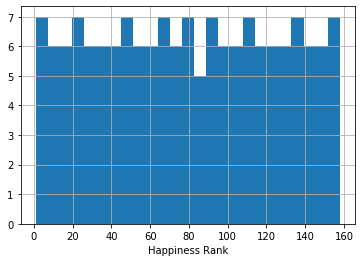

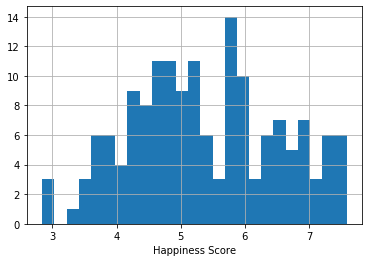

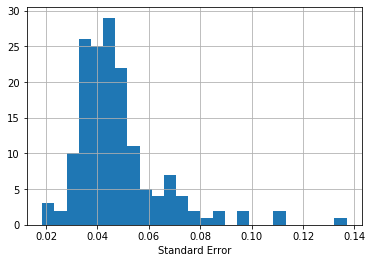

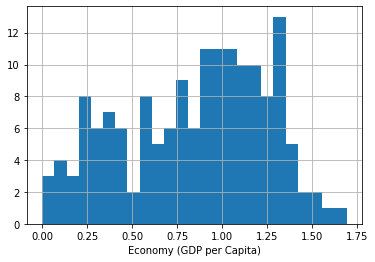

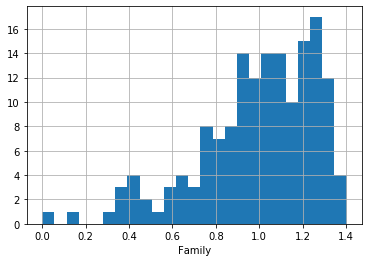

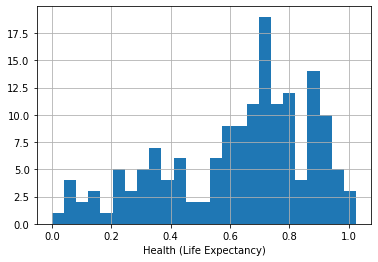

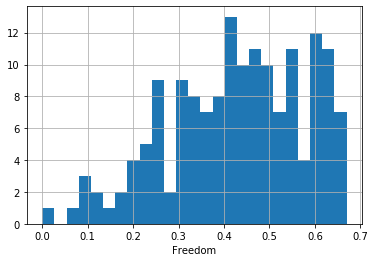

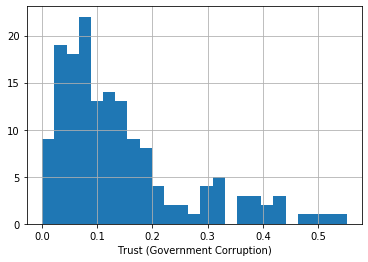

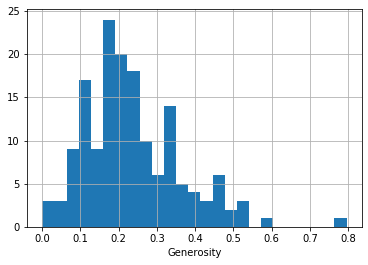

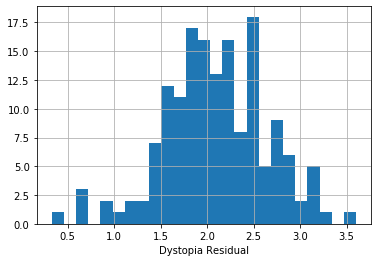

In [10]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [11]:
#from above graphs we can see some of the features are right skewed which need to be treated

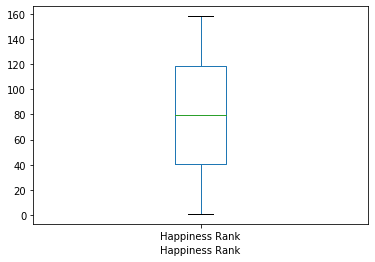

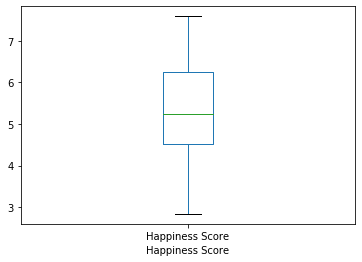

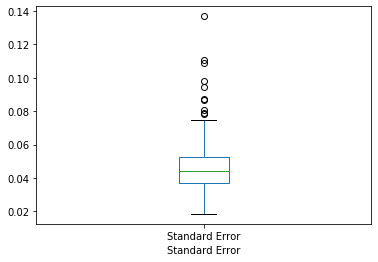

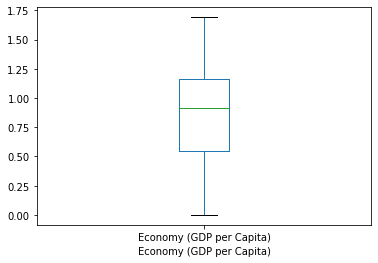

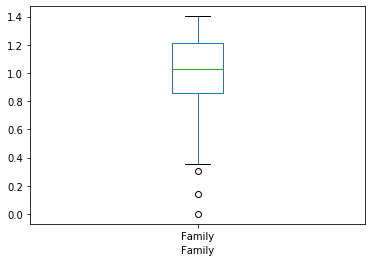

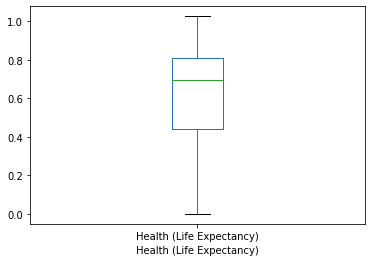

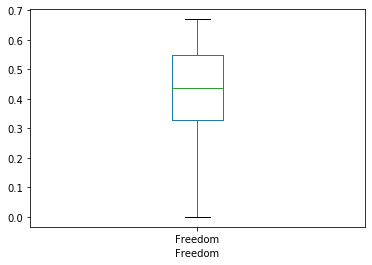

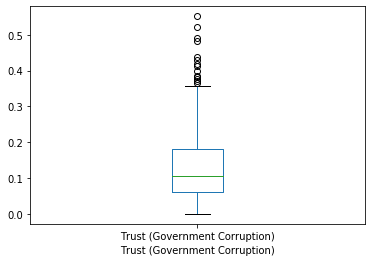

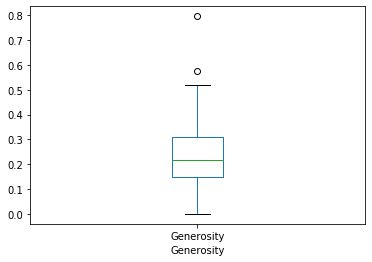

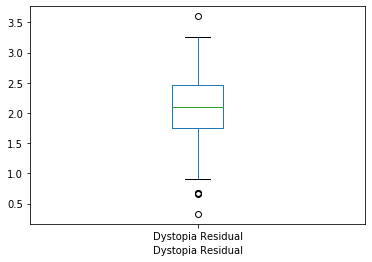

In [12]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Bivariate Analysis

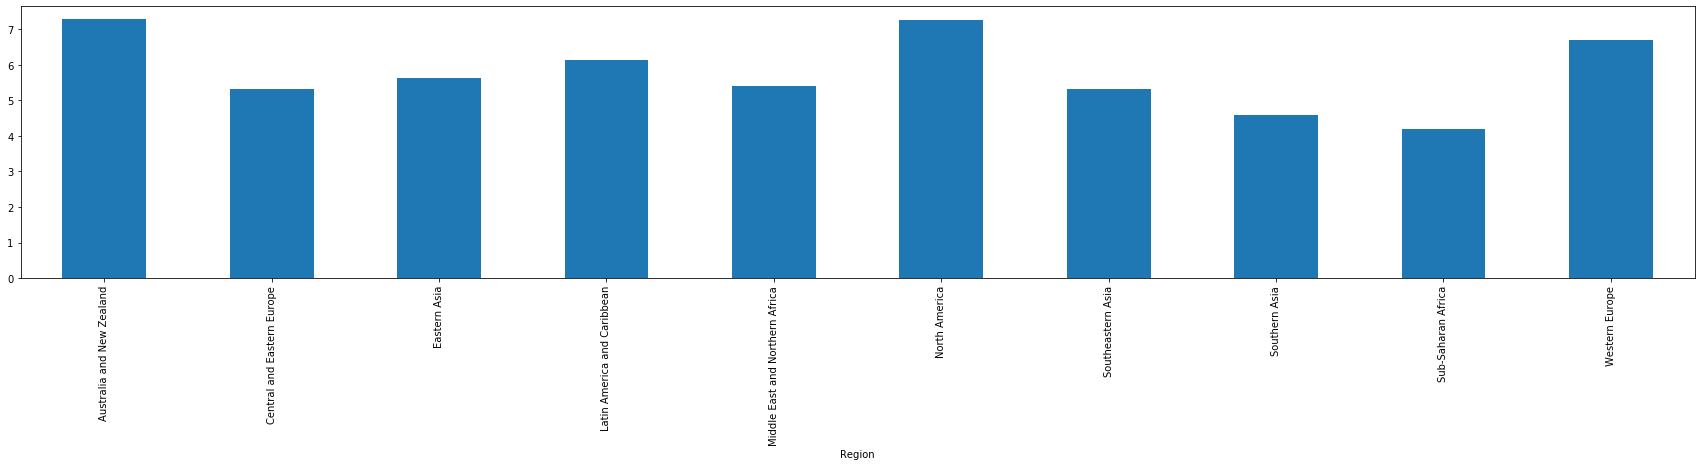

In [13]:
plt.figure(figsize=(30,5))
df.groupby(['Region'])['Happiness Score'].mean().plot.bar()
plt.show()

In [14]:
#we can see how happiness score varies from region to region
#SubSaharan Africa has the lowest happiness score

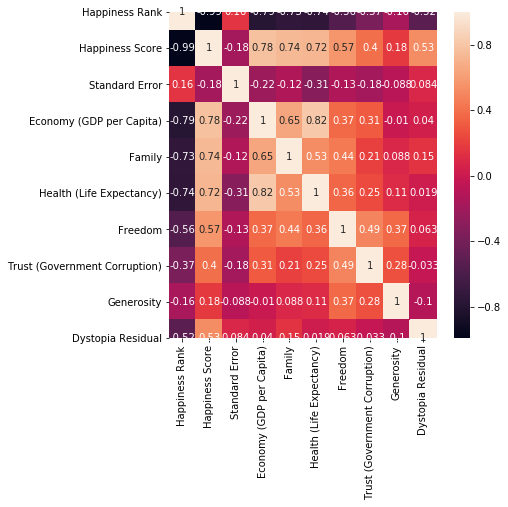

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)

In [16]:
#Except Standard error and Happiness score all other variable are positively correlated to Happiness Score.

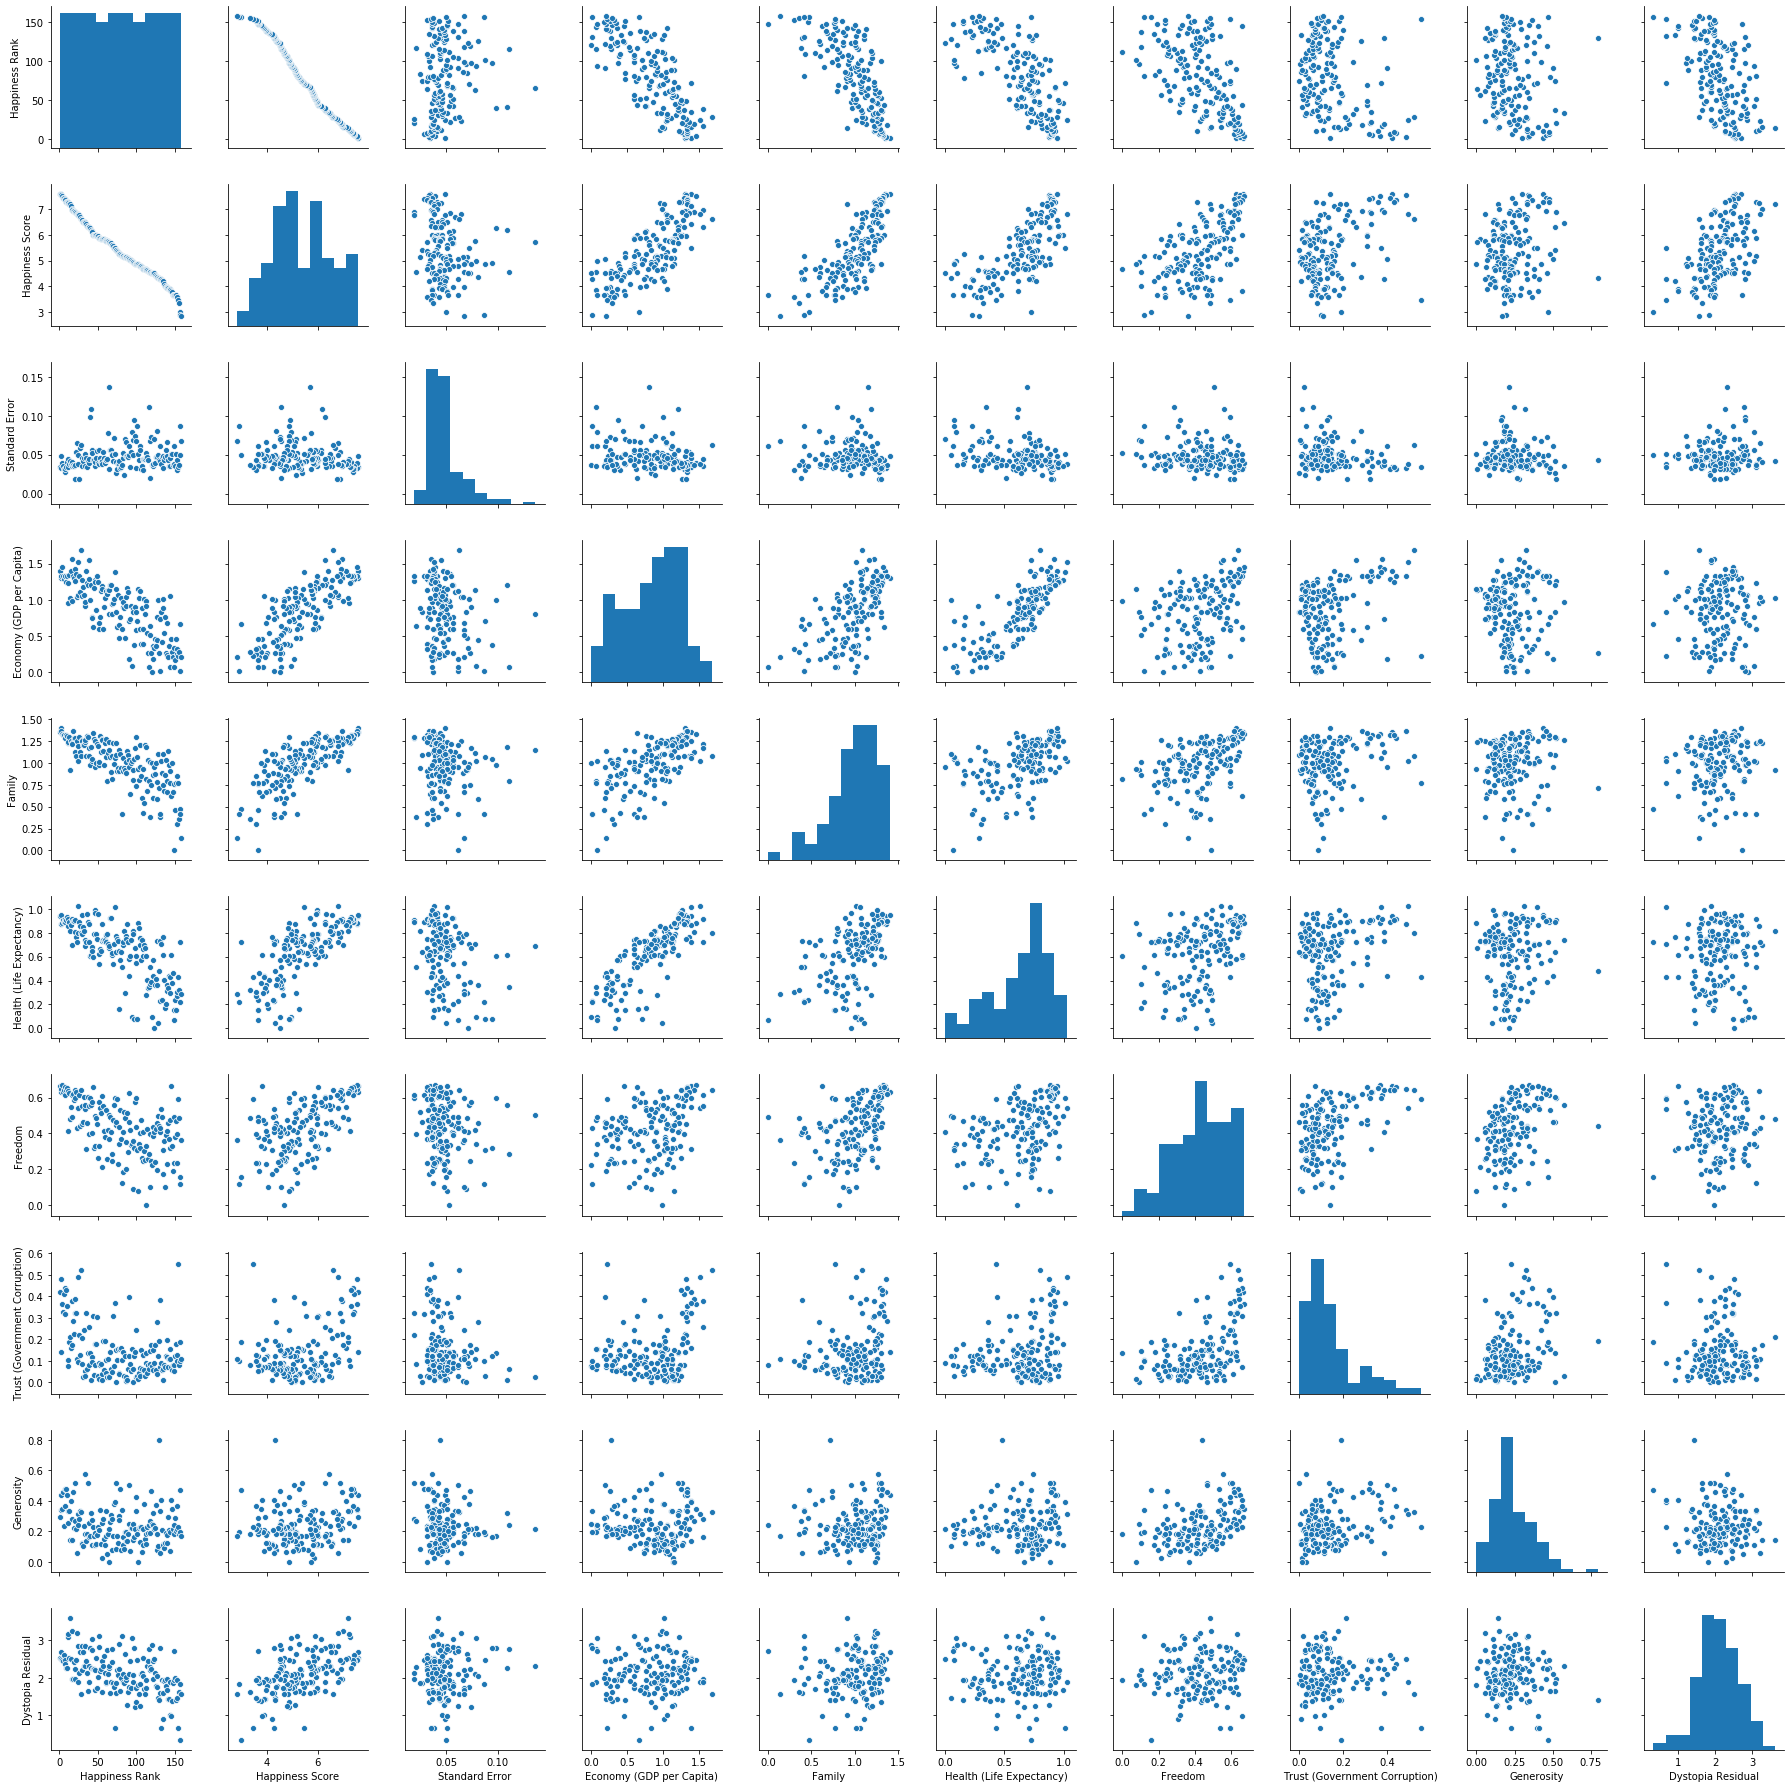

In [17]:
sns.pairplot(df)

# Feature Engineering

In [18]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [19]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [20]:

for col in numerical_features:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    

In [21]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.890608
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.180922
Generosity                       0.650767
Dystopia Residual               -0.238911
dtype: float64

In [22]:
#Removing outliers now
from scipy.stats import zscore
z=abs(zscore(df[numerical_features]))
z.shape

(158, 10)

In [23]:
df=df[(z<3).all(axis=1)]
df.shape

(150, 12)

In [24]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.033541,1.39651,1.34951,0.94143,0.66557,0.350502,0.259884,2.51738
1,Iceland,Western Europe,2,7.561,0.047685,1.30232,1.40223,0.94784,0.62877,0.132299,0.362070,2.70201
2,Denmark,Western Europe,3,7.527,0.032738,1.32548,1.36058,0.87464,0.64938,0.394451,0.293706,2.49204
3,Norway,Western Europe,4,7.522,0.038066,1.45900,1.33095,0.88521,0.66973,0.311176,0.297872,2.46531
4,Canada,North America,5,7.427,0.034913,1.32629,1.32261,0.90563,0.63297,0.284856,0.377141,2.45176


# Data Scaling

In [25]:
#Removing columns which are of no use for model building
y=df[['Happiness Score']]
X=df.drop(['Happiness Score','Happiness Rank','Country','Region'],axis=1)

In [26]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [27]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.878857,1.351700,1.360211,1.233475,1.569079,2.291081,0.587115,0.763669
1,0.185532,1.110946,1.570863,1.259677,1.325134,0.036585,1.664233,1.115914
2,-0.939284,1.170144,1.404443,0.960453,1.461757,2.745172,0.943625,0.715324
3,-0.538322,1.511427,1.286051,1.003661,1.596656,1.884765,0.987539,0.664327
4,-0.775590,1.172215,1.252727,1.087133,1.352976,1.612815,1.823090,0.638476


# Model building

In [28]:
y=y
x=x

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

# 1-KNN

In [31]:
knr=KNeighborsRegressor()
maxr2_score(knr,x,y)

max_r2_score is at random_state   89   which is   0.9491907289527662


89

In [32]:
#cross validation for knn model
from sklearn.model_selection import cross_val_score
cvs_knr_mean=cross_val_score(knr,x,y,cv=4,scoring='r2').mean()
cvs_knr_std=cross_val_score(knr,x,y,cv=4,scoring='r2').std()
print(cvs_knr_mean)
cvs_knr_std

-4.555996618731045


1.7179075560068233

# 2-LinearRegression

In [33]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max_r2_score is at random_state   81   which is   0.9999645777037752


81

In [34]:
#no gridsearchcv.direct cross vallidation

In [35]:
#cross validation for Linear regression model
from sklearn.model_selection import cross_val_score
cvs_lr_mean=cross_val_score(lr,x,y,cv=4,scoring='r2').mean()
cvs_lr_std=cross_val_score(lr,x,y,cv=4,scoring='r2').std()
print(cvs_lr_mean)
cvs_lr_std

0.9984802268434553


0.0007568677226742514

# 4-Gradient boosting technique(GBM)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
maxr2_score(gbr,x,y)

max_r2_score is at random_state   73   which is   0.9798534884541554


73

In [37]:
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
cvs_gbr_mean=cross_val_score(gbr,x,y,cv=4,scoring='r2').mean()
cvs_gbr_std=cross_val_score(gbr,x,y,cv=4,scoring='r2').std()
print(cvs_gbr_mean)
cvs_gbr_std

-2.589458179212711


1.3610977342750514

# 5-Adaboost

In [38]:
from sklearn.ensemble import AdaBoostRegressor
adar=AdaBoostRegressor()
maxr2_score(adar,x,y)

max_r2_score is at random_state   56   which is   0.941856494984761


56

In [39]:
adar=AdaBoostRegressor()
cvs_adar_mean=cross_val_score(adar,x,y,cv=4,scoring='r2').mean()
cvs_adar_std=cross_val_score(adar,x,y,cv=4,scoring='r2').std()
print(cvs_adar_mean)
cvs_adar_std

-6.411583340750283


1.3129454087484356

# Saving model

In [40]:
#From all the model tried above Linear regression  performance is best 
#corresponding random_state=81
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score=  ',r2_score(y_test,pred))

RMSE score=  0.006418192209946597
r2_score=   0.9999645777037752


In [41]:
from sklearn.externals import joblib
joblib.dump(knr,'practiceproject_17.csv')

['practiceproject_17.csv']

In [42]:
model=joblib.load('practiceproject_17.csv')

In [43]:
model.predict(x_test)

array([[4.5818],
       [6.2256],
       [4.722 ],
       [4.9496],
       [6.4994],
       [6.5032],
       [4.7234],
       [6.0504],
       [3.7634],
       [6.9016],
       [4.9236],
       [5.079 ],
       [4.3228],
       [4.3646],
       [5.9704],
       [4.8254],
       [7.4812],
       [5.6578],
       [5.9818],
       [5.616 ],
       [6.4692],
       [5.3034],
       [7.4572],
       [7.1602],
       [4.8604],
       [5.0186],
       [5.4496],
       [4.4894],
       [6.0902],
       [6.4308],
       [5.083 ],
       [6.0722],
       [5.4008],
       [5.3638],
       [6.1016],
       [6.068 ],
       [4.5192],
       [4.883 ]])